<a href="https://colab.research.google.com/github/patriciamediavilla/L1P2/blob/main/Quantumcuatri2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **QUANTUM COMPUTING**
### Patricia Mediavilla

## OPTIMIZACIÓN

Creamos modelos con medias y covarianzas y lo probaremos con datos históricos.

Vamos a utilizar los datos de la libreria yfinance de python.

Utilizaremos varianzas y medias, si cogemos mucho tiempo cogemos datos demasiado antiguos y no sería accuracy, por eso lo primero que debemos hacer es aprender a sacar datsos.

In [64]:
pip install yfinance

Buscamos las acciones del ibex, funciona con  un tickeyt que es el identificativo de una acción. yf sirve para descaragrme los datos pero tengo que encnontrar todo

In [65]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

Se ha importado la base de datos del ibex 35 de los tres meses últimos del 2023

In [66]:
# Obtener la lista de símbolos del IBEX 35 (puedes actualizarla según sea necesario)
ibex35_symbols = [
    'ACS.MC', 'AENA.MC', 'ALM.MC', 'AMS.MC', 'BBVA.MC', 'CABK.MC', 'CLNX.MC', 'COL.MC',
    'ELE.MC', 'ENC.MC', 'ENG.MC', 'FER.MC', 'GAS.MC', 'GRF.MC', 'IBE.MC', 'IDR.MC',
    'ITX.MC', 'MAP.MC', 'MAS.MC', 'MEL.MC', 'MRL.MC', 'MTS.MC', 'NHH.MC', 'NTGY.MC',
    'PHM.MC', 'REE.MC', 'REP.MC', 'SGRE.MC', 'SOL.MC', 'TEF.MC', 'TL5.MC', 'VIS.MC']

# Descargar datos históricos
start_date = "2023-10-01"
end_date = "2024-01-01"

ibex = yf.download(ibex35_symbols, start=start_date, end=end_date)

#Cojo solo el precio final
ibex_close = ibex['Adj Close']

ibex_close

[*********************100%%**********************]  32 of 32 completed
ERROR:yfinance:
5 Failed downloads:
ERROR:yfinance:['MAS.MC', 'SGRE.MC', 'TL5.MC', 'REE.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:['GAS.MC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-10-01 -> 2024-01-01)')


Ticker,ACS.MC,AENA.MC,ALM.MC,AMS.MC,BBVA.MC,CABK.MC,CLNX.MC,COL.MC,ELE.MC,ENC.MC,...,NHH.MC,NTGY.MC,PHM.MC,REE.MC,REP.MC,SGRE.MC,SOL.MC,TEF.MC,TL5.MC,VIS.MC
Date,,,,,,,,,,,,,,,,,,,,,
2023-10-02,33.325310,141.000000,9.370,56.806259,7.531667,3.772,32.171387,5.425,18.107143,3.162,...,3.970,24.674444,32.099998,NaN,14.892345,NaN,2.980,3.680244,NaN,56.737167
2023-10-03,33.058468,138.199997,9.030,56.607635,7.570833,3.722,30.193760,5.180,17.878246,3.036,...,3.905,24.537037,31.360001,NaN,14.572080,NaN,2.738,3.634037,NaN,56.152245
2023-10-04,32.969521,138.550003,9.205,56.567909,7.467042,3.702,29.314817,5.125,17.975649,3.046,...,3.905,24.537037,31.540001,NaN,13.980074,NaN,2.602,3.598418,NaN,55.567326
2023-10-05,31.655088,137.600006,9.350,56.766533,7.482709,3.734,29.474625,5.160,18.258118,3.080,...,3.925,24.811853,32.099998,NaN,13.965517,NaN,2.584,3.643663,NaN,56.542191
2023-10-06,32.534672,138.850006,9.425,57.084328,7.516000,3.819,29.494600,5.215,18.306818,3.120,...,4.000,24.988518,32.740002,NaN,13.790826,NaN,2.564,3.646551,NaN,57.127110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21,39.304493,164.149994,8.560,64.492981,8.232000,3.737,35.759998,6.535,18.798700,2.924,...,4.130,27.000000,42.900002,NaN,13.218230,NaN,3.416,3.623000,NaN,54.000000
2023-12-22,39.403320,164.399994,8.550,64.532707,8.238000,3.723,35.779999,6.560,18.852272,2.890,...,4.100,27.080000,42.860001,NaN,13.232788,NaN,3.370,3.584000,NaN,53.599998
2023-12-27,39.689926,164.500000,8.595,64.532707,8.242000,3.732,36.000000,6.605,18.750000,2.924,...,4.140,27.000000,42.540001,NaN,13.373510,NaN,3.450,3.571000,NaN,53.799999


Hemos cogido solo el precio final para no tener todos los precios durante los días

Tenemos que tener cuidado con los datos porque cambian todo el rato y si cogemos datos muy antiguos puede ir mal. Datos históricos del IBEX 35 de los últimos de las acciones día por dia de los ultimos 3 meses y a partir del tiempo de las acctions podemos calcular el retorno y veremos si crece y de crece y calculamos las covarianzas.

Graficamos los valores finales de cada día de cada una de las empresas


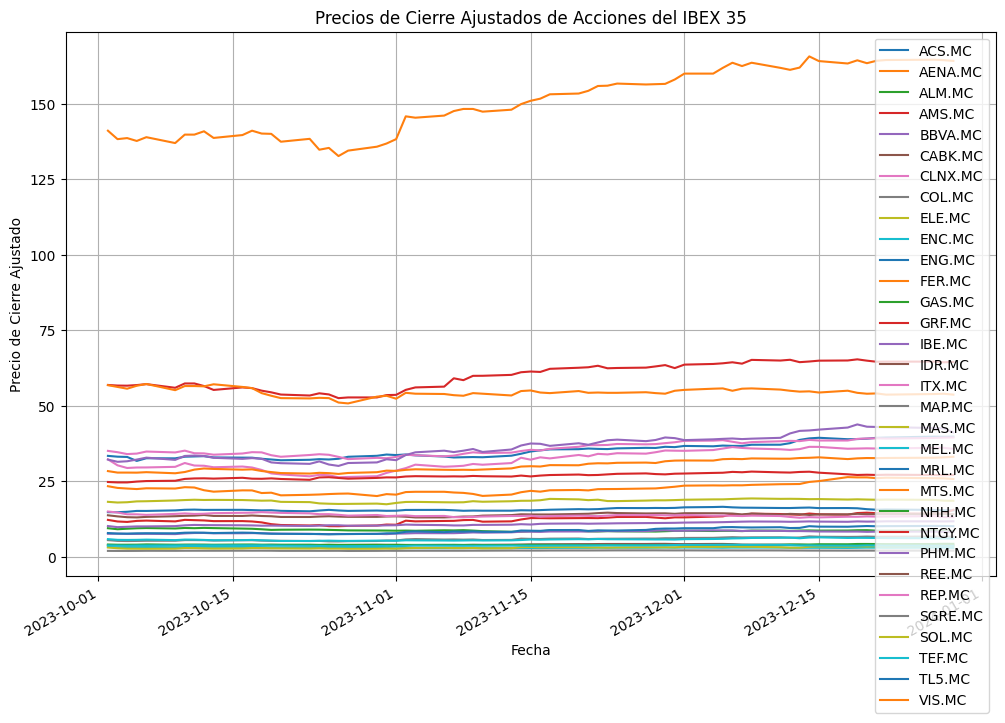

In [67]:
# Graficar los precios de cierre ajustados de todas las acciones
ibex_close.plot(figsize=(12, 8))
plt.title('Precios de Cierre Ajustados de Acciones del IBEX 35')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre Ajustado')
plt.legend(ibex35_symbols)  # Mostrar leyendas con los nombres de las acciones
plt.grid(True)
plt.show()

Los returns es la diferencia de un día con el anterior

In [68]:
returns = ibex_close.pct_change()
returns

Ticker,ACS.MC,AENA.MC,ALM.MC,AMS.MC,BBVA.MC,CABK.MC,CLNX.MC,COL.MC,ELE.MC,ENC.MC,...,NHH.MC,NTGY.MC,PHM.MC,REE.MC,REP.MC,SGRE.MC,SOL.MC,TEF.MC,TL5.MC,VIS.MC
Date,,,,,,,,,,,,,,,,,,,,,
2023-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-03,-0.008007,-0.019858,-0.036286,-0.003497,0.005200,-0.013256,-0.061472,-0.045161,-0.012641,-0.039848,...,-0.016373,-0.005569,-0.023053,NaN,-0.021505,NaN,-0.081208,-0.012556,NaN,-0.010309
2023-10-04,-0.002691,0.002533,0.019380,-0.000702,-0.013709,-0.005373,-0.029110,-0.010618,0.005448,0.003294,...,0.000000,0.000000,0.005740,NaN,-0.040626,NaN,-0.049671,-0.009801,NaN,-0.010417
2023-10-05,-0.039868,-0.006857,0.015752,0.003511,0.002098,0.008644,0.005451,0.006829,0.015714,0.011162,...,0.005122,0.011200,0.017755,NaN,-0.001041,NaN,-0.006918,0.012574,NaN,0.017544
2023-10-06,0.027786,0.009084,0.008021,0.005598,0.004449,0.022764,0.000678,0.010659,0.002667,0.012987,...,0.019108,0.007120,0.019938,NaN,-0.012509,NaN,-0.007740,0.000793,NaN,0.010345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21,0.007345,0.004897,-0.018911,-0.005513,0.007589,0.004840,-0.001675,-0.010598,-0.003357,-0.004765,...,-0.006017,-0.002954,-0.001861,NaN,-0.005113,NaN,0.030779,-0.015222,NaN,0.001855
2023-12-22,0.002514,0.001523,-0.001168,0.000616,0.000729,-0.003746,0.000559,0.003826,0.002850,-0.011628,...,-0.007264,0.002963,-0.000932,NaN,0.001101,NaN,-0.013466,-0.010765,NaN,-0.007407
2023-12-27,0.007274,0.000608,0.005263,0.000000,0.000486,0.002417,0.006149,0.006860,-0.005425,0.011765,...,0.009756,-0.002954,-0.007466,NaN,0.010634,NaN,0.023739,-0.003627,NaN,0.003731


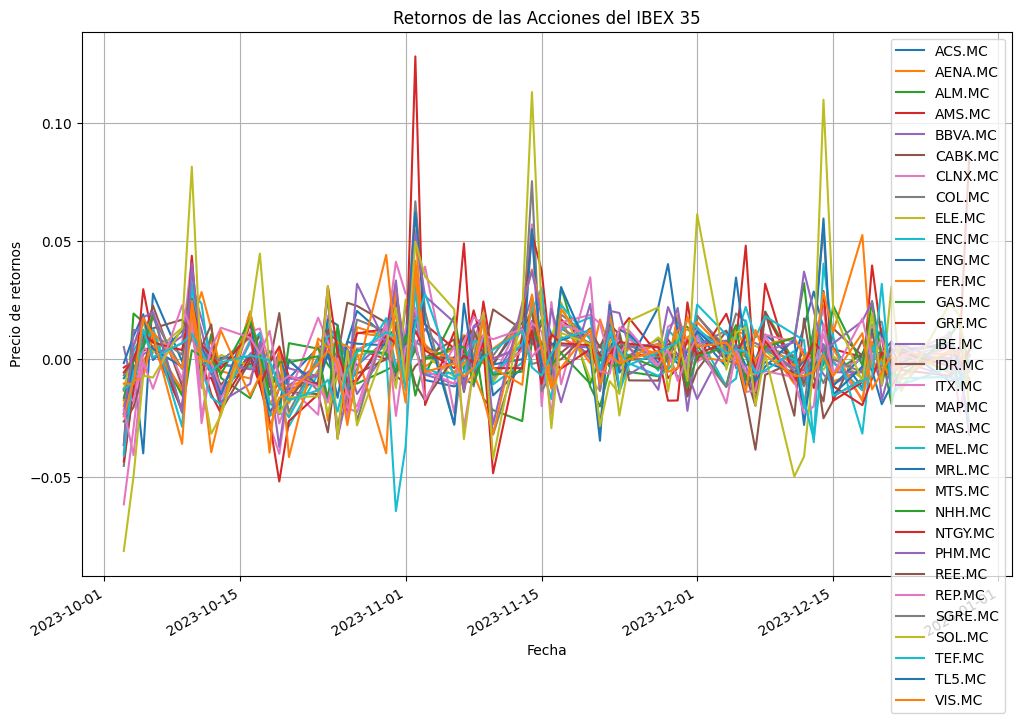

In [69]:
# Graficar los precios de cierre ajustados de todas las acciones
returns.plot(figsize=(12, 8))
plt.title('Retornos de las Acciones del IBEX 35')
plt.xlabel('Fecha')
plt.ylabel('Precio de retornos')
plt.legend(ibex35_symbols)  # Mostrar leyendas con los nombres de las acciones
plt.grid(True)
plt.show()

De los retornos necesito dos cosas la media para ver que acciones de media ganan más

In [86]:
media_retornos = returns.mean()
media_retornos

Ticker
ACS.MC     0.002880
AENA.MC    0.002517
ALM.MC    -0.001629
AMS.MC     0.002114
BBVA.MC    0.001482
CABK.MC   -0.000120
CLNX.MC    0.001875
COL.MC     0.003264
ELE.MC     0.000360
ENC.MC    -0.001630
ENG.MC     0.000650
FER.MC     0.002545
GAS.MC          NaN
GRF.MC     0.004330
IBE.MC     0.002392
IDR.MC     0.000478
ITX.MC     0.002004
MAP.MC     0.000669
MAS.MC          NaN
MEL.MC     0.000698
MRL.MC     0.004349
MTS.MC     0.001744
NHH.MC     0.000924
NTGY.MC    0.001490
PHM.MC     0.004174
REE.MC          NaN
REP.MC    -0.002032
SGRE.MC         NaN
SOL.MC     0.002900
TEF.MC    -0.000590
TL5.MC          NaN
VIS.MC    -0.000821
dtype: float64

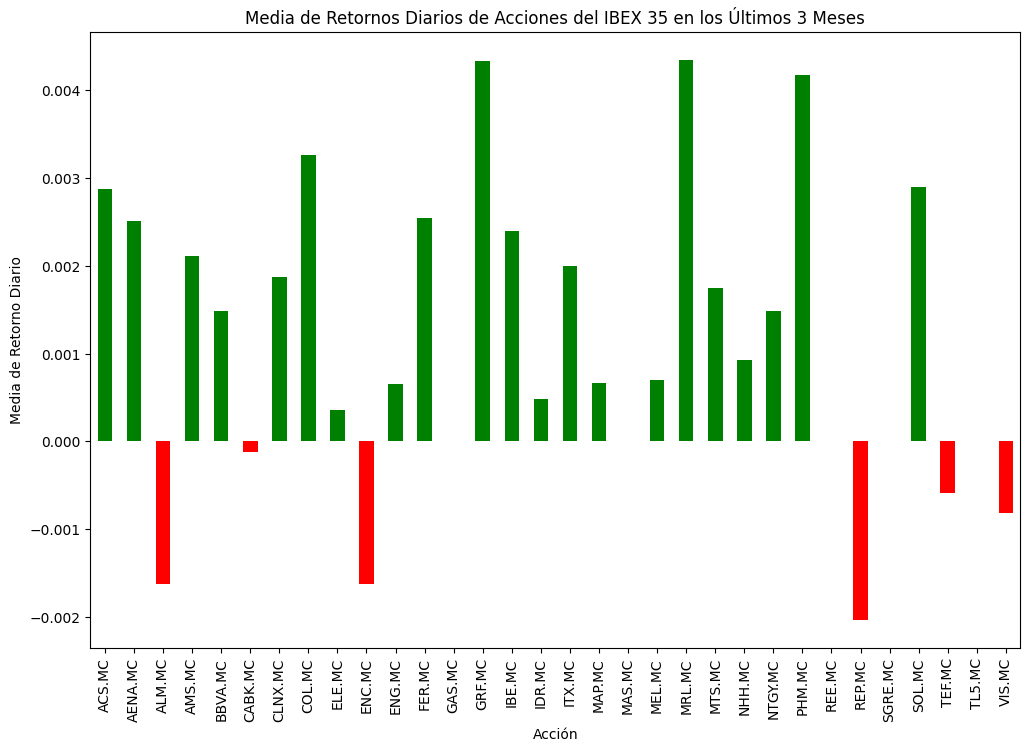

In [72]:
# Personalizar colores basados en el valor del retorno
colors = ['red' if val < 0 else 'green' for val in media_retornos]

# Graficar la media de los retornos con colores personalizados
ax = media_retornos.plot(kind='bar', figsize=(12, 8), title="Media de Retornos Diarios de Acciones del IBEX 35 en los Últimos 3 Meses", color=colors)
plt.xlabel("Acción")
plt.ylabel("Media de Retorno Diario")
plt.show(ax)

Ahora vamos a calcular la varianza ya que las que tengan la media más alta y la varianza más baja serán nuestra mejor opción porque será que siempre se mueve sobre esos valores

In [87]:
varianza_retornos = returns.var()
varianza_retornos

Ticker
ACS.MC     0.000117
AENA.MC    0.000137
ALM.MC     0.000171
AMS.MC     0.000165
BBVA.MC    0.000121
CABK.MC    0.000159
CLNX.MC    0.000433
COL.MC     0.000453
ELE.MC     0.000099
ENC.MC     0.000293
ENG.MC     0.000072
FER.MC     0.000091
GAS.MC          NaN
GRF.MC     0.000855
IBE.MC     0.000093
IDR.MC     0.000140
ITX.MC     0.000141
MAP.MC     0.000063
MAS.MC          NaN
MEL.MC     0.000271
MRL.MC     0.000379
MTS.MC     0.000345
NHH.MC     0.000109
NTGY.MC    0.000074
PHM.MC     0.000383
REE.MC          NaN
REP.MC     0.000185
SGRE.MC         NaN
SOL.MC     0.001187
TEF.MC     0.000129
TL5.MC          NaN
VIS.MC     0.000196
dtype: float64

In [84]:
varianza_retornos

Ticker
ACS.MC     0.000117
AENA.MC    0.000137
ALM.MC     0.000171
AMS.MC     0.000165
BBVA.MC    0.000121
CABK.MC    0.000159
CLNX.MC    0.000433
COL.MC     0.000453
ELE.MC     0.000099
ENC.MC     0.000293
ENG.MC     0.000072
FER.MC     0.000091
GAS.MC          NaN
GRF.MC     0.000855
IBE.MC     0.000093
IDR.MC     0.000140
ITX.MC     0.000141
MAP.MC     0.000063
MAS.MC          NaN
MEL.MC     0.000271
MRL.MC     0.000379
MTS.MC     0.000345
NHH.MC     0.000109
NTGY.MC    0.000074
PHM.MC     0.000383
REE.MC          NaN
REP.MC     0.000185
SGRE.MC         NaN
SOL.MC     0.001187
TEF.MC     0.000129
TL5.MC          NaN
VIS.MC     0.000196
dtype: float64

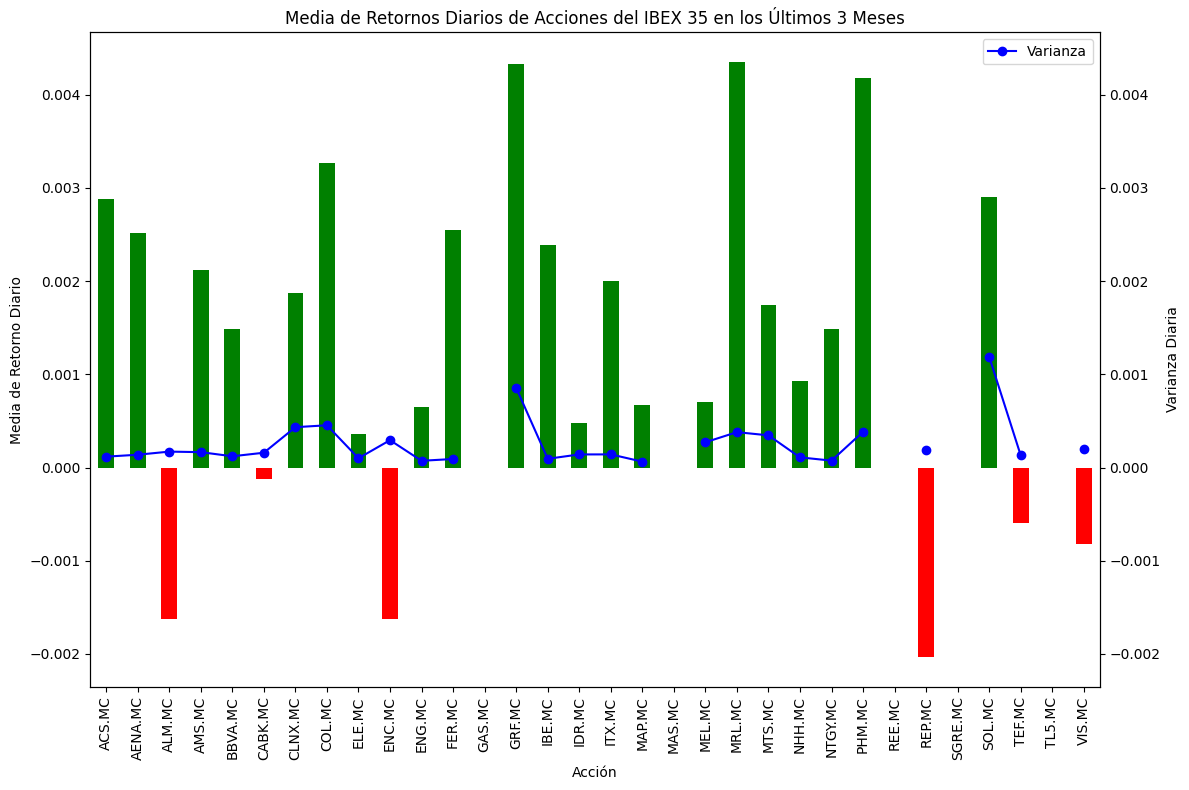

In [97]:
# Graficar la media de los retornos con colores personalizados
ax = media_retornos.plot(kind='bar', figsize=(12, 8), title="Media de Retornos Diarios de Acciones del IBEX 35 en los Últimos 3 Meses", color=colors)
plt.xlabel("Acción")
plt.ylabel("Media de Retorno Diario")

# Agregar las líneas de varianza encima de la barra correspondiente
ax2 = ax.twinx()  # Crear un segundo eje y para las varianzas
ax2.plot(ax.get_xticks(),varianza_retornos, linestyle='-', marker='o', color='blue', label='Varianza')
ax2.set_ylabel("Varianza Diaria")

# Compartir la misma escala en ambos ejes y
ax2.set_ylim(ax.get_ylim())

# Unir las leyendas de ambos ejes
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Covarinza para ver como se comportan entre ellas, cogeré las 5 más importantes y mejores y hago la covarianza

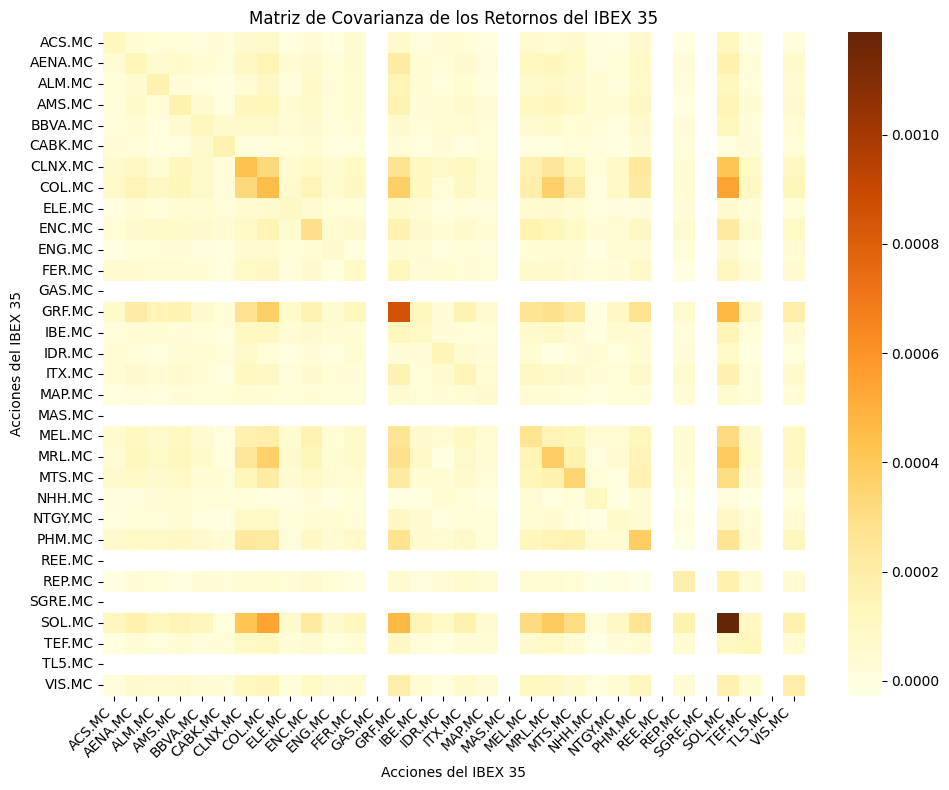

In [98]:
import seaborn as sns
covariance_matrix = returns.cov()

# Crear el gráfico de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix, annot=False, cmap='YlOrBr', fmt=".4f")

plt.title('Matriz de Covarianza de los Retornos del IBEX 35')
plt.xlabel('Acciones del IBEX 35')
plt.ylabel('Acciones del IBEX 35')

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [23]:
ibex_close.info

<bound method DataFrame.info of Ticker         ACS.MC     AENA.MC  ALM.MC     AMS.MC   BBVA.MC  CABK.MC  \
Date                                                                      
2023-09-01  31.951580  144.449997   9.410  62.725231  7.112588    3.686   
2023-09-04  31.991108  145.050003   9.595  62.844402  7.136088    3.641   
2023-09-05  31.882395  144.850006   9.650  62.367706  7.006839    3.643   
2023-09-06  31.862633  143.949997   9.665  61.970463  6.873674    3.591   
2023-09-07  32.010876  144.899994   9.605  61.732113  6.799258    3.520   
...               ...         ...     ...        ...       ...      ...   
2023-12-21  39.304493  164.149994   8.560  64.492981  8.232000    3.737   
2023-12-22  39.403320  164.399994   8.550  64.532707  8.238000    3.723   
2023-12-27  39.689926  164.500000   8.595  64.532707  8.242000    3.732   
2023-12-28  39.640514  164.350006   8.495  64.314217  8.192000    3.711   
2023-12-29  39.689926  164.100006   8.425  64.433388  8.226000    3.

Muestra el historial de los datos

In [16]:
hist = ibex.history(period="1mo")

AttributeError: 'DataFrame' object has no attribute 'history'

Enseña información del historial

In [8]:
ibex.history_metadata

{}